In [1423]:
import matplotlib, matplotlib.pyplot as plt
import scipy, scipy.special as sp
import seaborn as sns
import numpy as np
import numpy.linalg as npl
import math
import os
import torch
from scipy.integrate import odeint,solve_bvp
import scipy.integrate as integrate

In [1424]:
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'

In [1425]:
lim=5
P=int(1e4)
r=np.array([x for x in np.linspace(0,lim,P) if x!=0])
m=0.510 #in Mev
c=1
hbar=1
Z=1
e0=-1.602e-19
alpha=1/(137.035999084)

In [1426]:
k=-1 #Esta seria el valor de k para el estado base según su definición

In [1427]:
def odes(r,x,p):

    E=p[0]  #Proponemos que E sea un parámetro desconocido
    #coef
    a1=-(k+1)/r
    a2=E+(Z*alpha/r)+m
    b1=(k-1)/r
    b2=E+(Z*alpha/r)-m
    
    return np.vstack((a1*x[0]+a2*x[1],b1*x[1]-b2*x[0]))

In [1428]:
def bc(ya, yb,p):
    E=p[0]
    return np.array([ya[0], yb[0],ya[1]])

In [1429]:
y= np.zeros((2, r.shape[0]))
y[0,2]=alpha*np.exp(r[2]) #Generamos una solución ansatz que tanto f como g deben comportase como la funcion del atomo de Hidrogeno de Schrodinger.

In [1430]:
result = solve_bvp(odes,bc,r,y,p=[m-1.36e-5],verbose=2) #Resolvemos con un propuesta de E igual al atomo de Hidrogeno

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          3.72e-13       0.00e+00         9999            (0)      
Number of nodes is exceeded after iteration 1. 
Maximum relative residual: 3.72e-13 
Maximum boundary residual: 0.00e+00


In [1431]:
E=result.p[0]

In [1432]:
print(E) #Obtenemos que efectivamente las ODEs acopladas y la funcion de scipy aceptan este valor

0.5099863999406358


In [1433]:
x_measles_plot = np.linspace(0.2,lim,P-1)
y_measles_plot = result.sol(x_measles_plot)
g=y_measles_plot[0]
f=y_measles_plot[1]

In [1434]:
S=(f**2+g**2)*r**2
norm=integrate.simps((f**2+g**2)*r**2)
np.sqrt(norm)

4.730511696015433e-20

In [1435]:
gn=np.sqrt(1/norm)*g
fn=np.sqrt(1/norm)*f #Normalizamos las funciones radiales

In [1436]:
S2=(fn**2+gn**2)*r**2
norm2=integrate.simps((fn**2+gn**2)*r**2)
norm2

1.0000000000000002

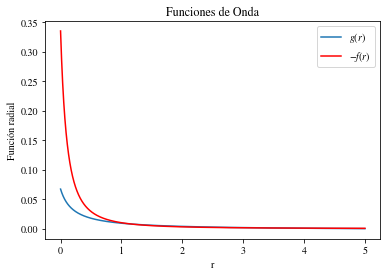

In [1437]:
plt.plot(r, gn , label='$g(r)$')
plt.plot(r, -fn, label='$-f(r)$',color='r')
plt.legend()
plt.xlabel('r')
plt.ylabel('Función radial')
plt.title('Funciones de Onda')
plt.show()

In [1438]:
abs(fn[0]/gn[0]) #Observamos que a priori una función es mucho mas grande que la otra.

4.999036982600468

In [1439]:
def angular_function(l, lproy, theta, phi):
    legendre = sp.lpmv(lproy, l, np.cos(theta))
    m=lproy
    if l==0 and m==1:
        return 0
    else:
        return ((-1) ** m) * np.sqrt(
        ((2 * l + 1) * np.math.factorial(l - m))
        / (4 * np.pi * np.math.factorial(l + m))) * legendre * np.real(np.exp(1.j * m * phi))

In [1440]:
def funciones(gn,fn,theta,lproy,phi): #m=0.5
    psi1=1j*gn*np.sqrt((k+0.5-lproy)/(2*k+1))*angular_function(-k-1,int(lproy-0.5),theta,phi)
    psi2=1j*gn*np.sqrt((k+0.5+lproy)/(2*k+1))*angular_function(-k-1,int(lproy+0.5),theta,phi)
    psi3=fn*np.sqrt((-k+0.5-lproy)/(-2*k+1))*angular_function(-k,int(lproy-0.5),theta,phi)
    psi4=fn*np.sqrt((-k+0.5-lproy)/(-2*k+1))*angular_function(-k,int(lproy+0.5),theta,phi)
    psiT=[psi1,psi2,psi3,psi4]
    psiTN=[]
    for i in psiT:
        if np.linalg.norm(i)!=0:
            psiTN.append(i/np.linalg.norm(i))
        else:
            psiTN.append(i)
    return psiTN

In [1441]:
def density(fun):
    return np.real(np.conj(fun)*fun)

In [1442]:
def densityN(fun):
    return density(fun)/np.mean(density(fun))

In [1443]:
theta=[i for i in np.linspace(0,np.pi,len(x_measles_plot))]
rho=densityN(funciones(gn,fn,theta,0.5,0))

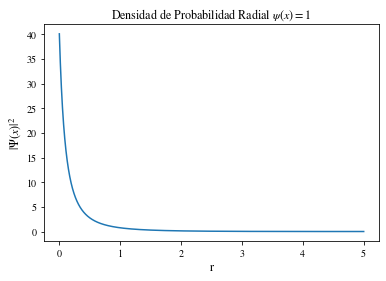

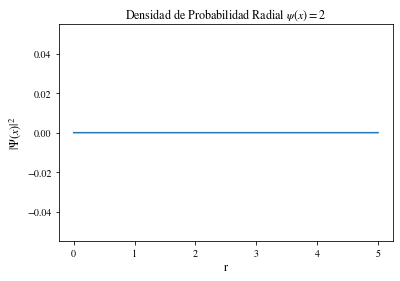

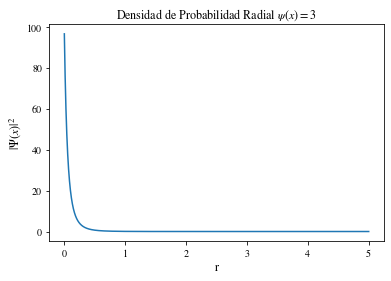

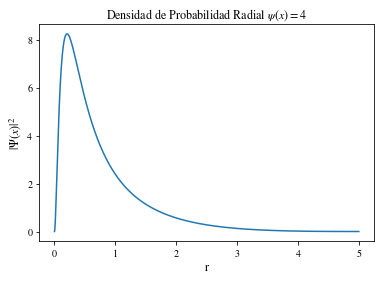

In [1444]:
for i in range(4):
    plt.plot(r,rho[i])
    plt.title('Densidad de Probabilidad Radial ' + '$\psi(x)= $'+str(i+1))
    plt.xlabel('r',fontsize=12)
    plt.ylabel(r'$|\Psi(x)|^{2}$',fontsize=12)
    plt.show()

In [1445]:
def ProbabilidadNegativa(funcion):
    positron=funcion
    return np.mean(np.real(np.conj(positron)*positron))

In [1446]:
np.mean(rho)

1.0000000000000002

In [1447]:
rhoP=ProbabilidadNegativa(funciones(gn,fn,theta,0.5,0)[0:1])

In [1448]:
rhoN=ProbabilidadNegativa(funciones(gn,fn,theta,0.5,0)[2:])
perrhoN=rhoN*100/(rhoN+rhoP)
print('La Probabilidad de encontrar un estado de energía negativo en el estado fundamental es: ', str(round(perrhoN,2)) +' %')

La Probabilidad de encontrar un estado de energía negativo en el estado fundamental es:  50.0 %
